<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/Quest03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quest 03: AARRR 분석/통계분석

## 1. 분석상황

<aside>
💡

문제 1 ~ 9 번: 여러분은 E-commere  플랫폼 기업에 입사했습니다. 데이터사이언티스트의 역할로 비즈니스 지표를 정의하고 분석보고서를 내는 프로젝트에 참여하게 되었습니다. 다음 문제들을 풀어보세요

AARRR을 포함한 **비즈니스 지표는 정답이 없으며 회사의 상황과 의사결정자의 판단에 따라 적절한 지표를 선택해주는 것이 중요**합니다. 문제는 문제대로 푸시되, AARRR 지표에 더 좋은 옵션이 있으면 추가적으로 고민하고 기술하면서 분석역량을 키워보세요!

</aside>

## 2. 데이터설명

- 데이터 출처: https://archive.ics.uci.edu/dataset/502/online+retail+ii
- 컬럼 설명
    - `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
    - `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
    - `Description`: Product (item) name. Nominal.
    - `Quantity`: The quantities of each product (item) per transaction. Numeric.
    - `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated.
    - `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£).
    - `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
    - `Country`: Country name. Nominal. The name of the country where a customer resides.

## 3. 문제

### **문제 1: 데이터 로드 및 탐색**

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.
- 예시결과

In [148]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)


Path to dataset files: /kaggle/input/online-retail-ii-uci


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [149]:
import pandas as pd

# 중복된 행을 제거하고, 첫 번째 행만 남김
retail = retail.drop_duplicates(keep='first')

### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [150]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail = retail.dropna(subset = ['Customer ID'])

In [151]:
retail['Customer ID'] = retail['Customer ID'].astype(int)
retail = retail.sort_values(by = 'InvoiceDate')
retail['Total'] = retail['Quantity']* retail['Price']

<ipython-input-151-7cee70f5fe61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Customer ID'] = retail['Customer ID'].astype(int)


In [152]:
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

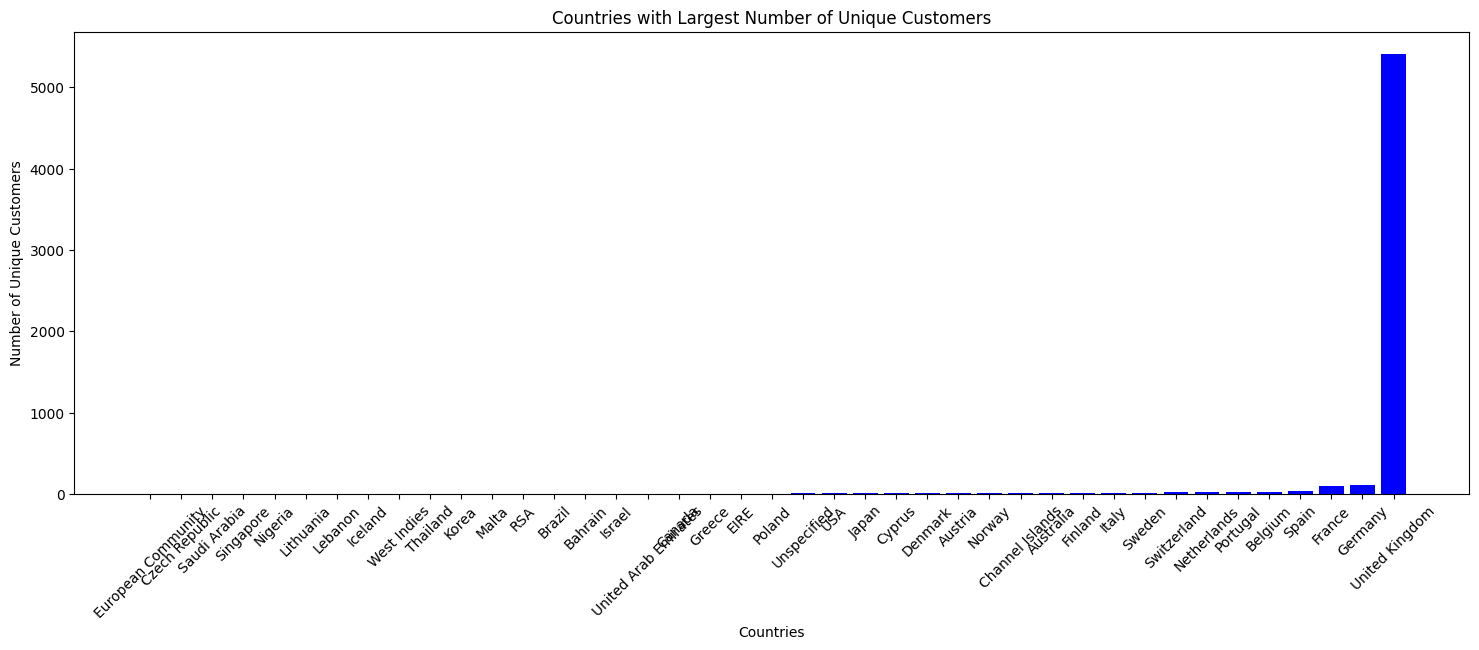

In [153]:
import matplotlib.pyplot as plt

u_customers = retail.groupby('Country')['Customer ID'].nunique().reset_index()
u_customers.columns = ['Country', 'Unique_Customers']
u_customers = u_customers.sort_values(by = 'Unique_Customers')

plt.figure(figsize = (18,6))
plt.bar(u_customers['Country'], u_customers['Unique_Customers'],color = 'b')
plt.title('Countries with Largest Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation = 45)
plt.show()

### **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

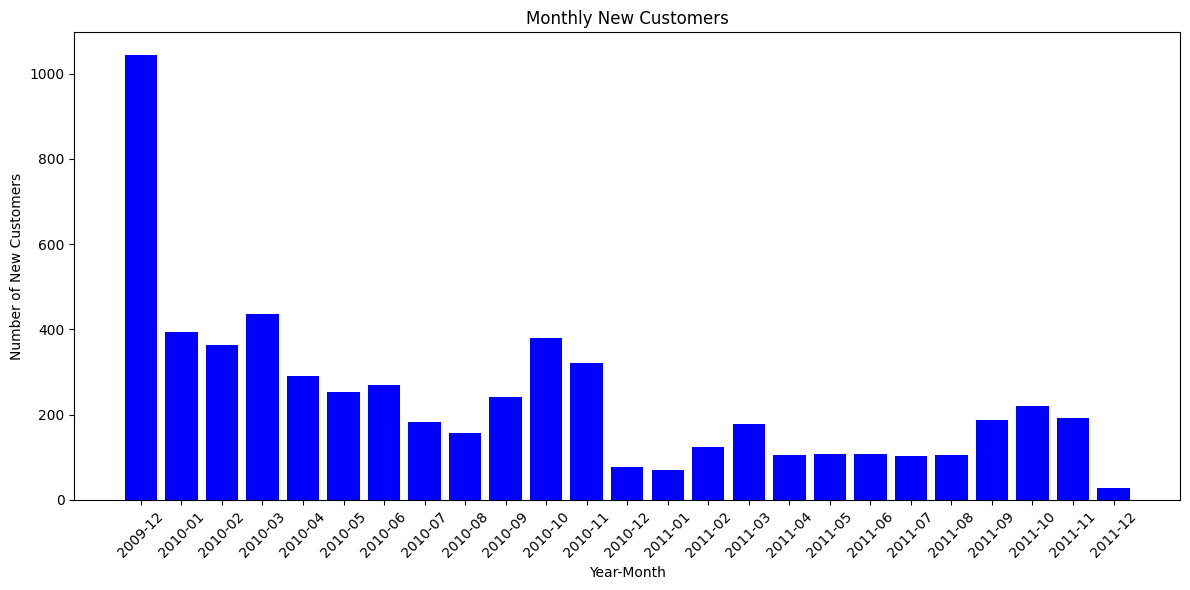

In [154]:

# 1. 각 고객의 첫 구매 날짜 추출
first_purchase = retail.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['Customer ID', 'FirstPurchaseDate']

# 2. 월별 신규 고객 수 계산
first_purchase['FirstPurchaseMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M')
monthly_new_customers = first_purchase.groupby('FirstPurchaseMonth').size().reset_index(name='NewCustomers')

# 3. 시각화
plt.figure(figsize=(12,6))
plt.bar(monthly_new_customers['FirstPurchaseMonth'].astype(str), monthly_new_customers['NewCustomers'], color='b')
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [155]:
# 1. 고객별 총 구매 금액 계산
customer_total = retail.groupby('Customer ID')['Total'].sum().reset_index()

# 2. 활성화 고객 여부 컬럼 추가
activation = 50
customer_total['Activated'] = customer_total['Total'] >= activation

# 3. 전체 고객 수, 활성화 고객 수, 활성화율 계산
total_customers = customer_total.shape[0]
activated_customers = customer_total['Activated'].sum()
activation_rate = activated_customers / total_customers

print(f'총 고객 수: {total_customers}')
print(f'활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객 ): {activated_customers}')
print(f'고객 활성화율: {activation_rate:.2%}')


총 고객 수: 5942
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객 ): 5774
고객 활성화율: 97.17%


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

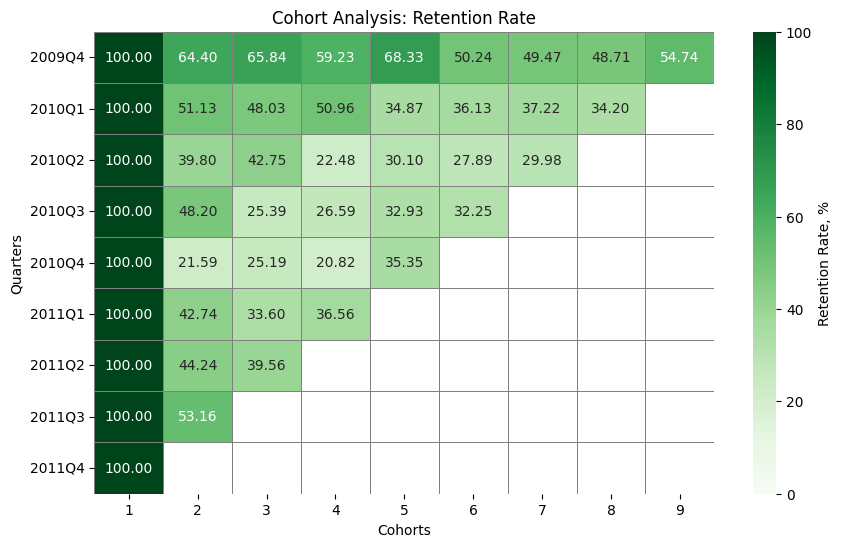

In [156]:
# 1. 코호트 및 경과 분기 생성
retail['Cohort'] = retail.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')
retail['InvoiceQuarter'] = retail['InvoiceDate'].dt.to_period('Q')
retail['CohortIndex'] = (retail['InvoiceQuarter'].astype(int) - retail['Cohort'].astype(int)) + 1

# 2. 코호트별 활성 고객 수 집계
cohort_data = retail.groupby(['Cohort', 'CohortIndex'])['Customer ID'].nunique().reset_index()

# 3. 코호트별 첫 분기 고객 수로 리텐션율 계산
cohort_sizes = cohort_data[cohort_data['CohortIndex'] == 1][['Cohort', 'Customer ID']].rename(columns={'Customer ID': 'CohortSize'})
cohort_data = pd.merge(cohort_data, cohort_sizes, on='Cohort')
cohort_data['RetentionRate'] = cohort_data['Customer ID'] / cohort_data['CohortSize'] * 100

# 4. 피벗 테이블 변환
retention = cohort_data.pivot(index='Cohort', columns='CohortIndex', values='RetentionRate')

import seaborn as sns

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    data=retention,
    annot=True,
    fmt='.2f',
    cmap='Greens',
    cbar_kws={'label': 'Retention Rate, %'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0, vmax=100
)
plt.title('Cohort Analysis: Retention Rate')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()


### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

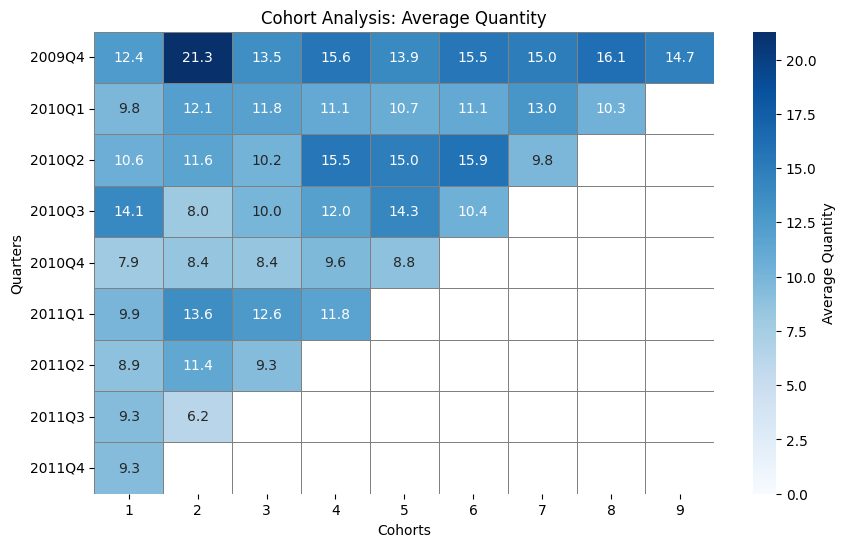

In [157]:
# 1. 날짜 및 코호트 정보 생성
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['InvoiceQuarter'] = retail['InvoiceDate'].dt.to_period('Q')
retail['Cohort'] = retail.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')
retail['CohortIndex'] = (retail['InvoiceQuarter'].astype(int) - retail['Cohort'].astype(int)) + 1

# 2. 코호트별 평균 구매수량 계산
cohort_quantity = retail.groupby(['Cohort', 'CohortIndex'])['Quantity'].mean().reset_index()

# 3. 피벗 테이블 생성
average_quantity = cohort_quantity.pivot(index='Cohort', columns='CohortIndex', values='Quantity')

# 4. 히트맵 시각화
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)
plt.title('Cohort Analysis: Average Quantity')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()


### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

<Figure size 1200x600 with 0 Axes>

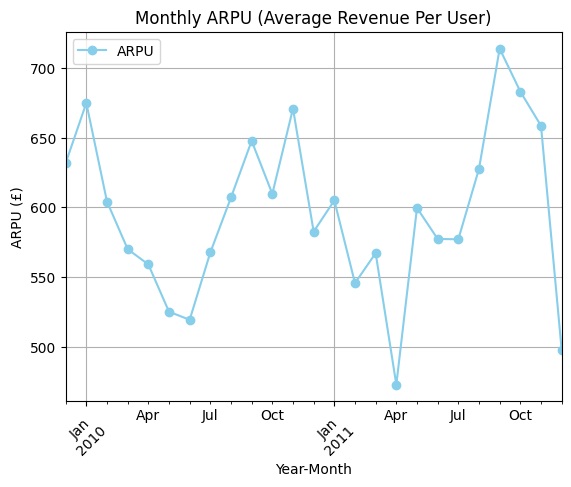

In [158]:
retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')
monthly_revenue_per_user = retail.groupby(['YearMonth', 'Customer ID'])['Total'].sum().reset_index()

monthly_total = monthly_revenue_per_user.groupby('YearMonth')['Total'].sum()
monthly_active_users = monthly_revenue_per_user.groupby('YearMonth')['Customer ID'].nunique()
arpu = (monthly_total / monthly_active_users).to_frame(name='ARPU')

plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [159]:
# 고객별 지표 계산
retail['avg_amount'] = retail.groupby('Customer ID')['Total'].transform('mean')
retail['purchase_counts'] = retail.groupby('Customer ID')['Invoice'].transform('nunique')
retail['days_active'] = (
    retail.groupby('Customer ID')['InvoiceDate'].transform('max') -
    retail.groupby('Customer ID')['InvoiceDate'].transform('min')
).dt.days + 1
retail['avg_purchase_freq'] = retail['purchase_counts'] / retail['days_active']
retail['retention_period'] = retail['days_active']

# CLV 컬럼 생성
retail['CLV'] = retail['avg_amount'] * retail['avg_purchase_freq'] * retail['retention_period']

retail = retail.drop(columns=['avg_amount', 'purchase_counts', 'days_active', 'avg_purchase_freq', 'retention_period'])

# CLV 기준 내림차순 정렬
retail.sort_values('CLV', ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Cohort,InvoiceQuarter,CohortIndex,YearMonth,CLV
144929,503183,22381,TOY TIDY PINK RETROSPOT,30,2010-03-30 14:26:00,1.49,18102,United Kingdom,44.70,2009Q4,2010Q1,2,2010-03,83112.603171
144930,503183,20711,JUMBO BAG TOYS,30,2010-03-30 14:26:00,1.38,18102,United Kingdom,41.40,2009Q4,2010Q1,2,2010-03,83112.603171
144934,503183,21718,RED METAL BEACH SPADE,30,2010-03-30 14:26:00,0.85,18102,United Kingdom,25.50,2009Q4,2010Q1,2,2010-03,83112.603171
144932,503183,22380,TOY TIDY SPACEBOY,30,2010-03-30 14:26:00,1.49,18102,United Kingdom,44.70,2009Q4,2010Q1,2,2010-03,83112.603171
773312,558776,48187,DOORMAT NEW ENGLAND,200,2011-07-04 10:20:00,4.58,18102,United Kingdom,916.00,2009Q4,2011Q3,8,2011-07,83112.603171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169510,C505490,M,Manual,-1,2010-04-22 12:55:00,5876.34,15849,United Kingdom,-5876.34,2010Q2,2010Q2,1,2010-04,-5876.340000
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918,United Kingdom,10953.50,2010Q1,2010Q1,1,2010-03,-10953.500000
135012,C502262,M,Manual,-1,2010-03-23 15:20:00,10953.50,12918,United Kingdom,-10953.50,2010Q1,2010Q1,1,2010-03,-10953.500000
135014,C502264,M,Manual,-1,2010-03-23 15:24:00,10953.50,12918,United Kingdom,-10953.50,2010Q1,2010Q1,1,2010-03,-10953.500000


# 기초통계 문제

### 문제10

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [160]:
waiting_times = np.random.uniform(5, 15, 100)

# 평균과 표준편차 계산
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 9.96
표준편차: 2.89


### 문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [161]:
outcomes = np.random.binomial(1, 0.3, 10)
success_count = np.sum(outcomes)

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 0 0 1 0 1 0 0 0]
성공 횟수: 2


### 문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [162]:
students = 20
questions = 5

# 각 문제의 정답 확률
prob_correct = 0.7

# 각 학생이 맞힌 점수 시뮬레이션 (1: 정답, 0: 오답)
scores = np.random.binomial(1, prob_correct, (students, questions))

# 학생별 점수 합계
scores = scores.sum(axis=1)

# 전체 학생 평균 점수
average_score = scores.mean()

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")


학생별 점수: [4 4 3 4 4 5 3 3 4 3 5 4 3 4 5 2 4 4 4 5]
평균 점수: 3.85


### 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

45g 이상 55g 이하 비율: 67.00%


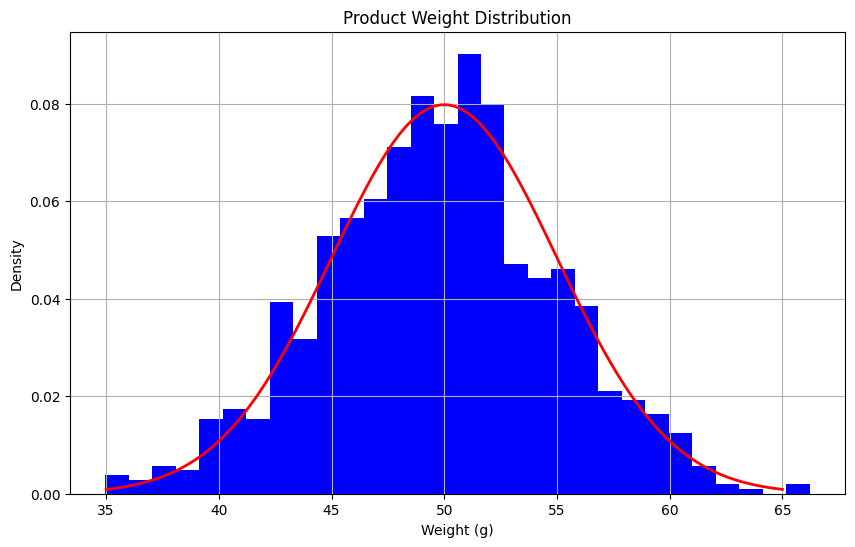

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean_ = 50
std_ = 5

weights = np.random.normal(mean_, std_, 1000)
within_range = np.mean((weights >= 45) & (weights <= 55))

x = np.linspace(mean_ - 3*std_, mean_ + 3*std_, 100)

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

plt.figure(figsize=(10, 6))
plt.hist(weights, bins=30, color='b', density=True)
plt.plot(x, norm.pdf(x, mean_, std_), color='r', linewidth=2)
plt.title('Product Weight Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.grid(True)
plt.show()
